# Exploring Covid Data of Turkey using PCA

#### 1.Loading Data

In [263]:
import pandas as pd
import numpy as np
import requests , json


In [264]:
# get data from API (url:"https://covid19.saglik.gov.tr/covid19api?getir=liste")
url = "https://covid19.saglik.gov.tr/covid19api?getir=liste"
r = requests.get(url)
#decode json data to a dict
data = json.loads(r.text)
df = pd.json_normalize(data)

# save df to csv as 'covid19turkey.csv'
df.to_csv('covid19turkey.csv',index = None) 

#get csv file 
df = pd.read_csv("/content/covid19turkey.csv")


In [265]:
# Show summary of records. Print names of columns and their datatypes
print("\t\tColumns names - Dtypes\n")
print(df.info())
print("\n\n\t\tStatistical Summary-Analysis\n")
print(df.describe())
print("\n\n\t\t First 5 Row \n")
df.head()

		Columns names - Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tarih                              253 non-null    object 
 1   gunluk_test                        237 non-null    float64
 2   gunluk_vaka                        237 non-null    float64
 3   gunluk_vefat                       237 non-null    float64
 4   gunluk_iyilesen                    229 non-null    float64
 5   toplam_test                        237 non-null    object 
 6   toplam_vaka                        253 non-null    float64
 7   toplam_vefat                       247 non-null    float64
 8   toplam_iyilesen                    237 non-null    float64
 9   toplam_yogun_bakim                 123 non-null    float64
 10  toplam_entube                      123 non-null    float64
 11  hastalarda_zaturre_oran         

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
0,18.11.2020,158.811,4.215,116.0,2.592,16.623.489,425.628,11.820,361.655,NaN,NaN,"3,8",3.742,"54,7","70,8","37,6",NaN,11.0,"99,6"
1,17.11.2020,156.692,3.819,103.0,2.688,16.464.678,421.413,11.704,359.063,NaN,NaN,"3,8",3.657,"54,7","70,8","37,6",NaN,11.0,"99,6"
2,16.11.2020,151.516,3.316,94.0,2.712,16.307.986,417.594,11.601,356.375,NaN,NaN,"3,8",3.610,"54,7","70,8","37,6",NaN,11.0,"99,6"
3,15.11.2020,142.496,3.223,89.0,2.561,16.156.470,414.278,11.507,353.663,NaN,NaN,"4,2",3.439,"53,5","69,9","34,9",NaN,12.0,"99,7"
4,14.11.2020,150.141,3.116,92.0,2.298,16.013.974,411.055,11.418,351.102,NaN,NaN,"4,2",3.423,"53,5","69,9","34,9",NaN,12.0,"99,7"


### 2.Data preprocessing

In [266]:
# convert "tarih" attribute to datetime
# be sure about date format in 'yyyy-mm-dd', if not correct them  
df['tarih'] = pd.to_datetime(df['tarih']) #convert date time 
df['tarih'] # i chechked date type . And it's correct, yyyy-mm-dd
#df.info()

0     2020-11-18
1     2020-11-17
2     2020-11-16
3     2020-11-15
4     2020-11-14
         ...    
248   2020-03-15
249   2020-03-14
250   2020-03-13
251   2020-12-03
252   2020-11-03
Name: tarih, Length: 253, dtype: datetime64[ns]

In [267]:
# move "tarih" attribute to first column
# sort data according to "tarih" in ascending order
print("First Column: ",df.columns[0]) # already 'tarih' attribute is first column. 

#Run the code below to move 'tarih' attribute to first column
tarih = df['tarih']
df.drop(labels=['tarih'],axis=1,inplace=True)
df.insert(0,'tarih',tarih)
print("New First Column: ",df.columns[0])

df = df.sort_values(by='tarih') #sorted by tarih as asc.

First Column:  tarih
New First Column:  tarih


In [268]:
# check data if dataframe cell is empty (blank), assign "NaN" value 
# print 5 corrected record as an example
# actually it's already filled with NaN . But to do that we can run the code below
# df_nan = df.replace('',np.nan) 
df.head()

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
231,2020-01-04,14.396,2.148,63.0,NaN,106.799,15.679,277.000,333.000,979.000,692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,2020-01-05,41.431,2.188,84.0,4.922,1.075.048,122.392,3.258,53.808,1.480,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,2020-01-06,31.525,827.000,23.0,974.000,2.070.719,164.769,4.563,128.947,651.000,283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,2020-01-07,52.313,1.192,19.0,2.311,3.433.963,201.098,5.150,175.422,1.035,362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2020-01-08,44.846,996.000,19.0,981.000,4.845.669,231.869,5.710,215.516,NaN,NaN,8.7,586.0,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
# check data types, be sure all data except "tarih" attibute is numeric. If not, convert them to numeric
# df.dtypes #ilk verileri inceledim hepsi float64 yada objectdi. Float64 olmayanları çektim.
for c in df.columns:
  if c == 'tarih':
    continue
  else:
    df[c] = pd.to_numeric(df[c],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 231 to 6
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   tarih                              253 non-null    datetime64[ns]
 1   gunluk_test                        237 non-null    float64       
 2   gunluk_vaka                        237 non-null    float64       
 3   gunluk_vefat                       237 non-null    float64       
 4   gunluk_iyilesen                    229 non-null    float64       
 5   toplam_test                        34 non-null     float64       
 6   toplam_vaka                        253 non-null    float64       
 7   toplam_vefat                       247 non-null    float64       
 8   toplam_iyilesen                    237 non-null    float64       
 9   toplam_yogun_bakim                 123 non-null    float64       
 10  toplam_entube                      123

In [270]:
# drop records that at least 60 percent of cells are empty
df = df.dropna(thresh=df.shape[0]*0.4,axis=1) # Önce %60 boş olan sutunları atıyorum. Sonra %60 boş olan satırları atıyorum.
df = df.dropna(thresh=df.shape[1]*0.4,axis=0) #En az 19*0.4 ü doluysa atma. Eğer bu değerden azsa zaten %60'dan cogu boş oldugundan at.


#thresh parametresi NaN olmayanları sınır olarak alıyor. Eğer 0.6 boş 0.4 dolu , 
#axis=0 x ekseni için. yani satıra göre 
print("Shape: ",df.shape)
print("Sum: ",df.isna().sum())

Shape:  (237, 11)
Sum:  tarih                   0
gunluk_test             0
gunluk_vaka             0
gunluk_vefat            0
gunluk_iyilesen         8
toplam_vaka             0
toplam_vefat            0
toplam_iyilesen         0
toplam_yogun_bakim    114
toplam_entube         114
agir_hasta_sayisi     124
dtype: int64


In [271]:
# print columns names, that have missing values (NaN entry), and also count missing values for each column as following exaxmple:
# There is NaN values in agir_hasta_sayisi column!: 140/241 (NaN/total)
cols = df.columns
for c in cols:
  print("There is NaN values in",c," column!: ",df.get(c).isna().sum(),"/",len(df.get(c)),("(NaN/total)"))

There is NaN values in tarih  column!:  0 / 237 (NaN/total)
There is NaN values in gunluk_test  column!:  0 / 237 (NaN/total)
There is NaN values in gunluk_vaka  column!:  0 / 237 (NaN/total)
There is NaN values in gunluk_vefat  column!:  0 / 237 (NaN/total)
There is NaN values in gunluk_iyilesen  column!:  8 / 237 (NaN/total)
There is NaN values in toplam_vaka  column!:  0 / 237 (NaN/total)
There is NaN values in toplam_vefat  column!:  0 / 237 (NaN/total)
There is NaN values in toplam_iyilesen  column!:  0 / 237 (NaN/total)
There is NaN values in toplam_yogun_bakim  column!:  114 / 237 (NaN/total)
There is NaN values in toplam_entube  column!:  114 / 237 (NaN/total)
There is NaN values in agir_hasta_sayisi  column!:  124 / 237 (NaN/total)


##### Data Cleaning

In [272]:
'''
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
'''

'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import PolynomialFeatures\n'

In [273]:
'''
def kntrl():
  print('df_nan shape: ',df.shape)
  print(df.info())
  print(df.head(10))
  print(df.isna().sum())
kntrl()
'''

"\ndef kntrl():\n  print('df_nan shape: ',df.shape)\n  print(df.info())\n  print(df.head(10))\n  print(df.isna().sum())\nkntrl()\n"

In [274]:

#Fitting Polynomial Regression to fill missing values
'''
def PolyRegImputer(df):
    """
    input: dataframe with missing values
    output: filled dataframe 
    use imported sklearn functions to predict missing values
    """
    df_hasNaN = df.copy().drop(columns='tarih',axis=1)
    df_hasNoNaN = df_hasNaN.dropna()
    
    #Code is below that Define missing column names 
    print("Missing columns:")
    missing_column_names = []
    for c in df:
      if df[c].isna().any():
        missing_column_names.append(c)
      else:
        continue
    print(type(missing_column_names))
    print(missing_column_names)


    #Fit polynomial regression
    pol_feat = PolynomialFeatures(degree=2,include_bias = False)   
    pol_fit = pol_feat.fit_transform(df_hasNoNaN)

    lin_model = LinearRegression()
    lin_fit =   lin_model.fit(df_hasNoNaN,df_hasNoNaN)


    #Code is below fill NaN values with Predict values
    for c in missing_column_names: #c is refer column name in missing column names
        PREDICTION_VALUE = lin_model.predict(pol_fit)
        print("PREDICTION VAL: ",PREDICTION_VALUE)
        df[c].fillna(PREDICTION_VALUE)
    
    df_filled = df
    return df_filled

df_filled=PolyRegImputer(df)
'''
#boş kalmasın diye mean ile doldurdum.

#df_has_missing_values = df.copy()
#print(df.mean())
missing_column_names = []
for c in df:
  if df[c].isna().any():
    missing_column_names.append(c)
  else:
    continue
    
for c in missing_column_names:
  df[c] = df[c].fillna(df[c].mean())
#df.head()


In [275]:
df.isna().any()

tarih                 False
gunluk_test           False
gunluk_vaka           False
gunluk_vefat          False
gunluk_iyilesen       False
toplam_vaka           False
toplam_vefat          False
toplam_iyilesen       False
toplam_yogun_bakim    False
toplam_entube         False
agir_hasta_sayisi     False
dtype: bool


#### 2.2. Data Transformation

In [276]:
# scale your data, get mean centered data :Önce veriyi scale et, sonra mean centering uygula.
df_scaled = df.copy()
for c in df_scaled:
  if c == 'tarih':
    continue
  else:
    df_std = np.std(df[c])
    avg = df_scaled.get(c).mean()
    df_scaled[c] = (df_scaled.get(c) - avg) / df_std 



'''
    avg = df_scaled.get(c).mean()
    max = df_scaled.get(c).max()
    min = df_scaled.get(c).min() 
    df_scaled[c] = (df_scaled.get(c) - avg) / (max-min) 
'''
df_scaled.head(10)

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,agir_hasta_sayisi
231,2020-01-04,-1.384777,-0.441224,0.439581,0.000000,-2.062702,0.343176,1.252873,2.349693e+00,1.393460e+00,2.354645e-15
201,2020-01-05,-0.711142,-0.441115,1.126272,-0.462339,-1.010874,-0.161765,-1.373510,-1.170473e+00,2.087959e+00,2.354645e-15
170,2020-01-06,-0.957972,1.800713,-0.868401,2.395781,-0.593180,-0.159358,-0.666671,1.168526e+00,-8.609092e-01,2.354645e-15
140,2020-01-07,-0.439994,-0.443822,-0.999199,-0.470040,-0.235100,-0.158275,-0.229477,-1.172076e+00,-4.254688e-01,2.354645e-15
109,2020-01-08,-0.626050,2.260053,-0.999199,2.416426,0.068198,-0.157242,0.147691,-1.432900e-15,1.033941e-14,1.600258e+00
78,2020-01-09,0.983521,-0.442789,-0.083612,-0.473897,0.460846,-0.155938,0.433789,-1.432900e-15,1.033941e-14,3.366201e+00
48,2020-01-10,1.085756,-0.443238,0.570380,-0.472721,0.937561,-0.152534,0.765125,-1.432900e-15,1.033941e-14,-9.483386e-01
17,2020-01-11,1.329870,-0.441338,0.799276,-0.472387,1.503360,-0.148727,1.182189,-1.432900e-15,1.033941e-14,-9.454172e-01
230,2020-02-04,-1.276114,-0.440386,0.962774,0.000000,-2.038494,0.488898,2.024255,-1.171838e+00,1.895043e+00,2.354645e-15
200,2020-02-05,-0.838544,-0.441672,0.930075,-0.463728,-0.991328,-0.161621,-1.331639,-1.170600e+00,1.867483e+00,2.354645e-15


	 Correlation Matrix 
                      gunluk_test  gunluk_vaka  ...  toplam_entube  agir_hasta_sayisi
gunluk_test            1.000000    -0.281390  ...  -5.780414e-02      -3.174808e-01
gunluk_vaka           -0.281390     1.000000  ...  -1.798245e-01       8.103837e-02
gunluk_vefat           0.332397    -0.386317  ...   1.762805e-01      -4.603526e-01
gunluk_iyilesen       -0.149943     0.184821  ...  -1.194946e-01       3.992776e-01
toplam_vaka            0.922755    -0.086842  ...  -1.112463e-01      -2.685689e-01
toplam_vefat          -0.131403     0.104219  ...   1.739825e-02      -1.651941e-03
toplam_iyilesen        0.707781    -0.086068  ...   5.070535e-02      -1.889866e-01
toplam_yogun_bakim    -0.011534     0.052189  ...  -2.231910e-01       3.796601e-33
toplam_entube         -0.057804    -0.179824  ...   1.000000e+00      -1.872296e-32
agir_hasta_sayisi     -0.317481     0.081038  ...  -1.872296e-32       1.000000e+00

[10 rows x 10 columns]
	 Covarience Matrix 
       

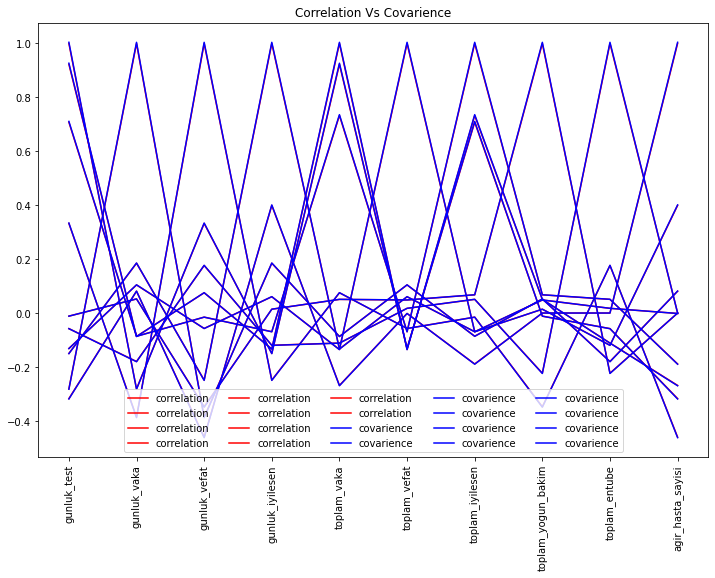

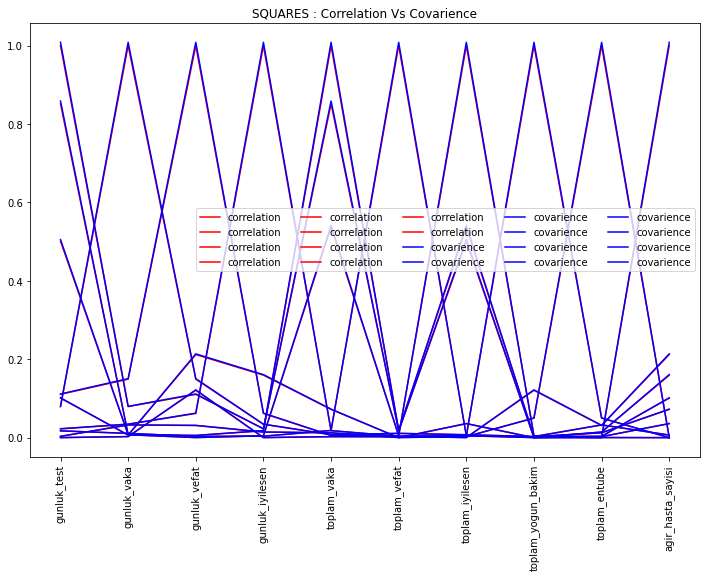

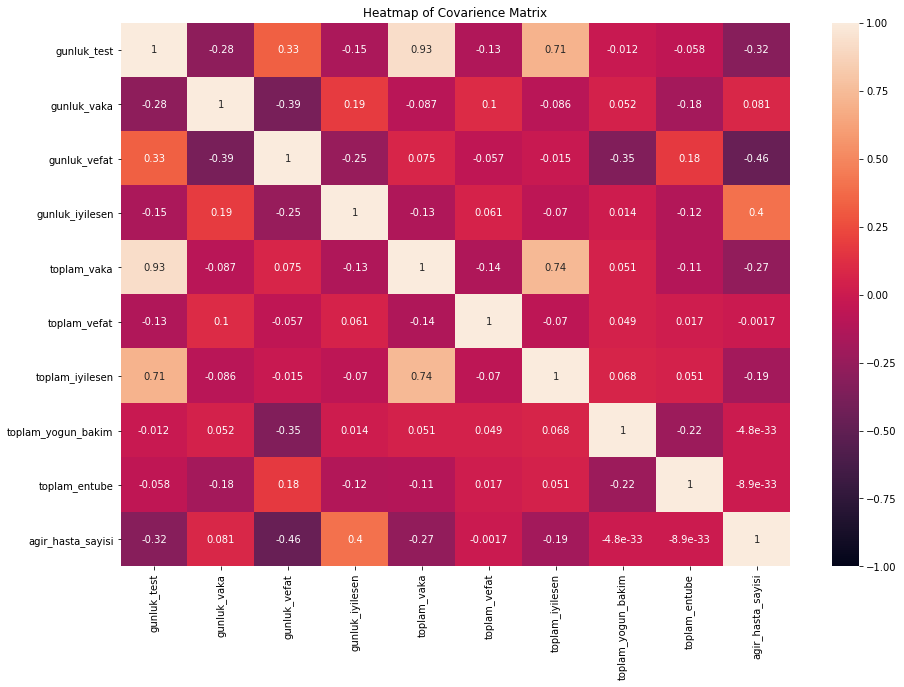

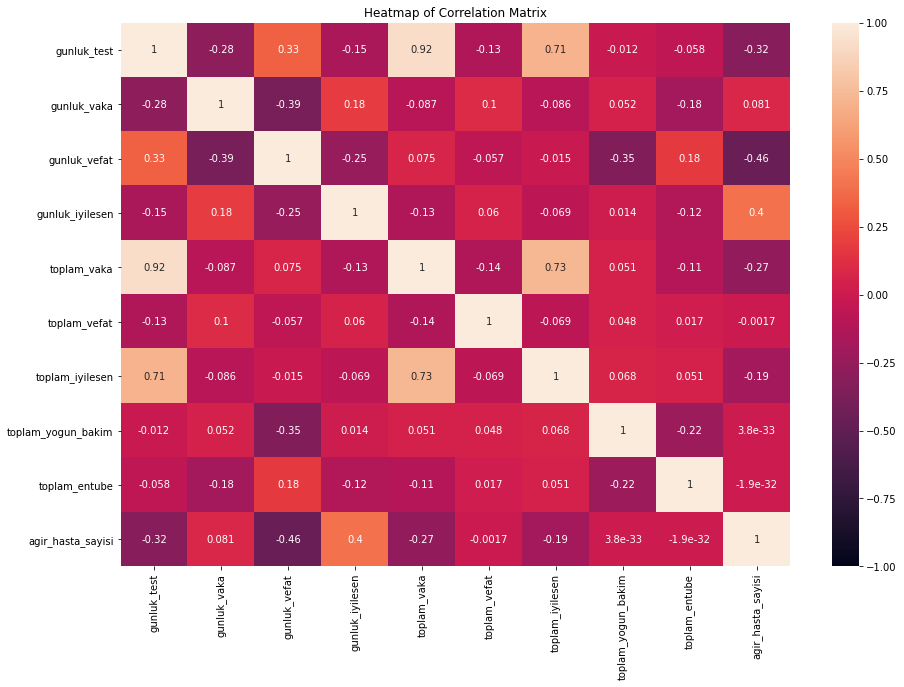

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate correlation and covariance matrices
correlation = df_scaled.corr()
print("\t Correlation Matrix \n ",correlation)

covarience = df_scaled.cov()
print("\t Covarience Matrix \n ",covarience)

# plot correlation vs covariance (compare also their squares in a plot)
# plot covarience
#plot vs
plt.figure(figsize=(12,8))
plt.plot(correlation,c='r',label='correlation')
plt.plot(covarience,c='b',label='covarience')
plt.title("Correlation Vs Covarience")
plt.xticks(rotation=90)
plt.legend(loc='best',ncol=5)
plt.show()

#plot vs Squares
plt.figure(figsize=(12,8))
plt.plot(correlation**2,c='r',label='correlation')
plt.plot(covarience**2,c='b',label='covarience')
plt.title("SQUARES : Correlation Vs Covarience")
plt.xticks(rotation=90)
plt.legend(loc='best',ncol=5)
plt.show()

#Covarience matrix
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(covarience,vmin=-1,vmax=1,annot=True)
plt.title("Heatmap of Covarience Matrix")
plt.show()
# plot correlation heatmap using Seaborn
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [278]:
# calculate variances for each attribute 
variances = df_scaled.var()
print("Attiribute  -->  Variance")
for k,v in dict(variances).items():
  print(k, " --> ",v)
print(len(variances),"adet varyans hesaplanmıştır.")

Attiribute  -->  Variance
gunluk_test  -->  1.0042372881355934
gunluk_vaka  -->  1.0042372881355919
gunluk_vefat  -->  1.0042372881355925
gunluk_iyilesen  -->  1.004237288135593
toplam_vaka  -->  1.0042372881355932
toplam_vefat  -->  1.0042372881355925
toplam_iyilesen  -->  1.0042372881355934
toplam_yogun_bakim  -->  1.0042372881355934
toplam_entube  -->  1.0042372881355939
agir_hasta_sayisi  -->  1.0042372881355934
10 adet varyans hesaplanmıştır.


In [279]:
import numpy as np

In [280]:
#descending -> largest to smallest
A = np.array([15,2,90,34])
A[A.argsort()[::-1][0]]
df['tarih']

231   2020-01-04
201   2020-01-05
170   2020-01-06
140   2020-01-07
109   2020-01-08
         ...    
129   2020-12-07
98    2020-12-08
67    2020-12-09
37    2020-12-10
6     2020-12-11
Name: tarih, Length: 237, dtype: datetime64[ns]

In [281]:
df_tarih_yok = df.copy().drop('tarih',axis=1)
def PCA(data, n_dim):
    """
    input: unscaled 2D numpy array
    output: transformed data, eigenvalues, eigenvectors
    
    Note: don't use Sklearn for decomposition, use only numpy library
    """
    # convert data to mean centered data
    np.mean(data)
    data = np.subtract(data,np.mean(data))
    # i gave mean centered data
    # calculate covairance matrix 
    covarience = np.cov(data)
    # calculate eigenvectors and eigenvalues
    e_val, e_vec = np.linalg.eig(covarience)
    # sort eigenvalues in decending and also eigenvectors
    idx = e_val.argsort()[::-1] #büyükten kücüge sırala 
    #e_val_1st, e_vec_1st = e_val[idx],e_vec[:,idx] # en büyük degerleri al 

    # get first n_dim eigenvectors ????
    e_vec_1st = e_vec[:,idx][:n_dim]
    # transform your data using those eigenvectors
    x_pca = e_vec_1st.T
    return x_pca , e_val, e_vec

x_pca, e_val, e_vec = PCA(np.array(df_tarih_yok),2)

#print(x_pca)



In [282]:
x_pca.shape

(237, 2)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


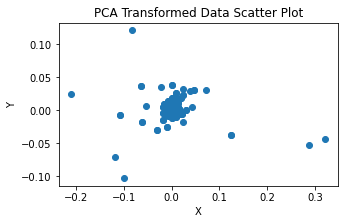

In [283]:
# plot scatter of transformmed data 
x_pca = x_pca
plt.figure(figsize=(5,3))
plt.scatter(x_pca[:,0],x_pca[:,1])
# set title and axis names
plt.title("PCA Transformed Data Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [284]:
# also using Sklearn 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [285]:
x_new = np.array(df_tarih_yok) #

In [286]:
scaler = StandardScaler()
scaler.fit(x_new)
print(x_new)

[[ 14.396        2.148       63.         ... 979.         692.
  218.99821239]
 [ 41.431        2.188       84.         ...   1.48       818.
  218.99821239]
 [ 31.525      827.          23.         ... 651.         283.
  218.99821239]
 ...
 [ 98.326        1.509       48.         ... 326.51041463 439.19089431
    1.241     ]
 [115.605        1.614       58.         ... 326.51041463 439.19089431
    1.417     ]
 [148.482        2.841       88.         ... 326.51041463 439.19089431
    3.23      ]]


In [287]:
pca = PCA(n_components=2) # for n_dim = 2

In [288]:
# transform your data
x_transformed = pca.fit_transform(x_new)
# convert transformed data to dataframe 
df_x_transformed = pd.DataFrame(x_transformed)

In [289]:
# print variance ratios and total variance
comps = pca.components_
ratios = pca.explained_variance_ratio_
totalVariance = np.sum(pca.singular_values_)

print("Components:",comps,
      "\n\nVariance Ratios: ",ratios,
      "\nTotal_Variance: ",totalVariance)


Components: [[-0.0127256   0.14065209 -0.00647385  0.08144223 -0.02906926  0.98524383
  -0.01700102  0.03622597 -0.0036404   0.01467191]
 [-0.0307489   0.73362265 -0.0367647   0.59757487 -0.03770606 -0.1626922
  -0.03331074  0.06210077 -0.11611757  0.23678057]] 

Variance Ratios:  [0.40818168 0.21177312] 
Total_Variance:  14466.373293934012


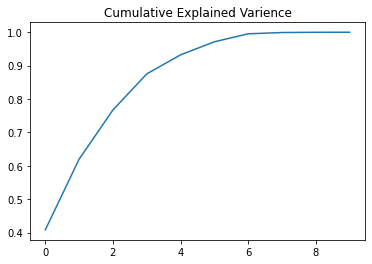

In [290]:
# plot cumulative explained variance wrt components
pca.fit(x_transformed)
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.title("Cumulative Explained Varience")
plt.show()

In [291]:
# compare sklearn and your principal components, print them and check equalty 
print("\t Sklearn PCA Components \n",comps)
print("\t My PCA \n",x_pca)
print("\nEquality: ",x == x_pca,"\n")

	 Sklearn PCA Components 
 [[-0.0127256   0.14065209 -0.00647385  0.08144223 -0.02906926  0.98524383
  -0.01700102  0.03622597 -0.0036404   0.01467191]
 [-0.0307489   0.73362265 -0.0367647   0.59757487 -0.03770606 -0.1626922
  -0.03331074  0.06210077 -0.11611757  0.23678057]]
	 My PCA 
 [[ 2.47771549e-02+0.00000000e+00j  3.25153439e-02+0.00000000e+00j]
 [-1.19663251e-01+0.00000000e+00j -7.05706574e-02+0.00000000e+00j]
 [ 4.21352612e-02+0.00000000e+00j  4.09166972e-03+0.00000000e+00j]
 [ 7.13481364e-02+0.00000000e+00j  2.98677321e-02+0.00000000e+00j]
 [-8.28789116e-02+0.00000000e+00j  1.21122113e-01+0.00000000e+00j]
 [-1.04441677e-02+0.00000000e+00j -6.63362280e-05+0.00000000e+00j]
 [-9.98053185e-02+0.00000000e+00j -1.03391823e-01+0.00000000e+00j]
 [ 2.86866270e-01+0.00000000e+00j -5.21522469e-02+0.00000000e+00j]
 [-5.39744686e-02+0.00000000e+00j  5.72393560e-03+0.00000000e+00j]
 [ 3.21302230e-01+0.00000000e+00j -4.42756667e-02+0.00000000e+00j]
 [ 1.24965258e-01+1.25640647e-01j -3.77287

In [292]:
# print shape for transformed and original data
print("Original shape: ",x_new.shape)
print("Transformed shape: ",x_transform.shape)

Original shape:  (237, 10)
Transformed shape:  (237, 2)


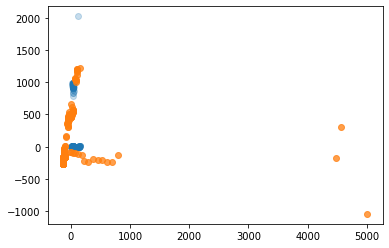

In [293]:
# get also principal components and project original data for given variance=0.9
# plot for principal component pairs
plt.scatter(x_new[:,0],x_new[:,1],alpha=0.25)
plt.scatter(x_transform[:,0],x_transform[:,1],alpha=0.75)

#### 2.2 Plot Principal Components

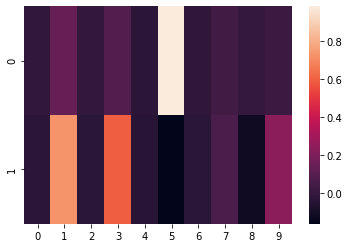

In [294]:
# create a dataframe from pca components 
df_pca_comp = pd.DataFrame(comps)

# plot seaborn heatmap as given sample plot
sns.heatmap(df_pca_comp)
